# Tradeshow Second Look

** July 16 2017 ** <br>
*Geoffrey Pidcock | geoff@geoffpidcock.com*

## Setup

In [ ]:
# Installing packages 
# !conda install -c jos_pol pandas-profiling

In [1]:
# Importing libraries
import pandas as pd
import pandas_profiling
# !conda install -c jos_pol pandas-profiling
import matplotlib as plot
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

## Data read into python in a data frame

In [11]:
# Read
path1 = '../Tradeshow_Data/_Delegates.xlsx'
Deleg = pd.read_excel(path1,sheetname='_Delegates',index_col=None)
# Confirmation of successful read
print(Deleg.shape)
print(Deleg.head)

(10140, 21)
<bound method NDFrame.head of                                      qr_uid Customer Prospect Leaders Summit  \
0      b24b4c99-52aa-4eaf-87ef-7820ee7238f0      Yes      NaN            NaN   
1      eca0acaa-6b1c-41e0-bcbc-5734fbe34a85      Yes      NaN            NaN   
2      d08e011e-c141-44ed-bb96-6ce4139a4d74      Yes      NaN            NaN   
3      5b43be68-b942-4005-8577-afa7085490b0      Yes      NaN            NaN   
4      438192c1-cefa-4744-8015-823ba5eaf701      Yes      NaN            NaN   
5      f50f632b-545a-410d-a684-35dfdd952de1      Yes      NaN            NaN   
6      026d8191-a9ff-4d5e-9bd8-370f7278b160      Yes      NaN            NaN   
7      a0755f2d-45cc-48a6-8108-2ba2fb4a97d7      Yes      NaN            NaN   
8      c07c8d59-d1da-4a7b-88fb-955331456d96      Yes      NaN            NaN   
9      f9443c5b-1bb6-4bfe-b6e9-0fd54ee5751a      Yes      NaN            NaN   
10     31d85d1e-316a-4c32-9f43-298eecbaa478      Yes      NaN            NaN  

In [12]:
# Some transformations to ease handling and manage nulls (based on TradeShow_Homework2 explorations)
# Transformation to help pandas profiling
Deleg['Industry']=Deleg['Industry'].replace(to_replace=0,value="Unknown").fillna("Unknown")
# Conversion of column name text to snake case
Deleg.columns = [x.strip().replace(' ', '_') for x in Deleg.columns]
Deleg.rename(columns={'walk-in': 'walk_in'}, inplace=True)

In [16]:
list(Deleg.columns)

['qr_uid',
 'Customer',
 'Prospect',
 'Leaders_Summit',
 'registered',
 'walk_in',
 'manual',
 'cancelled',
 'badge_printed',
 'Member_Type',
 'Lead_Contact_ID',
 'Acount_ID',
 'Job_Function',
 'Job_Level',
 'Industry',
 'Employees',
 'TOTAL_Attendance_Points',
 'TOTAL_Engagement_Points',
 'TOTAL_Attendance_and_Engagement_Points',
 'Oppty_Created',
 'No._of_Oppty']

In [19]:
# Conversion of table values from Yes to 1 and NA to 0
Deleg.replace(to_replace='Yes',value=1,inplace=True)
Deleg.fillna(value=0,inplace=True)
print(Deleg.Customer.value_counts())
print(Deleg.TOTAL_Engagement_Points.describe())

1.0    5911
0.0    4229
Name: Customer, dtype: int64
count    10140.000000
mean        56.630671
std         58.038602
min          0.000000
25%          0.000000
50%         75.000000
75%        105.000000
max        280.000000
Name: TOTAL_Engagement_Points, dtype: float64


In [20]:
# Creation of Job Level Feature
# Strategy - pool categories into "JL_ManagerPlus" and "JL_Unknown"
Deleg.Job_Level.value_counts()

Manager Level           3298
Staff Level             1903
Uncategorized           1655
Director Level          1202
Unspecified              913
C Level                  623
Executive Level          398
Student / JobSeeker       75
VP Level                  51
Manager                   10
Board Level                5
0                          4
Executive Management       3
Name: Job_Level, dtype: int64

In [27]:
Deleg['JL_ManagerPlus']=Deleg.Job_Level.map({'Manager Level':1,'C Level':1,'Executive Level':1,'VP Level':1,'Manager':1,'Board Level':1,'Executive Management':1,'Director Level':1})
Deleg.JL_ManagerPlus.value_counts()

1.0    5590
Name: JL_ManagerPlus, dtype: int64

In [26]:
Deleg['JL_Unknown']=Deleg.Job_Level.map({'Uncategorized':1,'Unspecified':1, np.NaN:1,0:1})
Deleg.JL_Unknown.value_counts()

1.0    2572
Name: JL_Unknown, dtype: int64

In [31]:
Deleg.JL_ManagerPlus.fillna(value=0,inplace=True)
Deleg.JL_Unknown.fillna(value=0,inplace=True)

In [30]:
# Creation of Industry Feature
# Strategy - create a dummy for target industries
Deleg.Industry.value_counts()
# Deleg.Industry.isnull().sum() - Blanks pooled into Unknown

Unknown                                     2597
Financial Services                          1227
High Tech                                    998
Media & Communications                       903
Manufacturing                                896
Professional Services                        891
Healthcare & Life Sciences                   482
Engineering, Construction, & Real Estate     390
Retail                                       353
Hospitality, Travel, & Transportation        313
Other                                        302
Public Sector                                272
Education                                    216
Agriculture & Mining                          73
Nonprofit Institutions                        52
Higher Education                              47
Consulting                                    18
Finance                                       11
High-Tech Software/Services                    8
Information and Communication Technology       8
High_Tech           

In [34]:
Deleg['Industry_FINS']=Deleg.Industry.map({'Financial Services':1,'Financial_Services':1})
Deleg['Industry_HiTech']=Deleg.Industry.map({'High Tech':1,'High_Tech':1,'High-Tech Software/Services':1,'Technology':1})
Deleg.Industry_FINS.fillna(value=0,inplace=True)
Deleg.Industry_HiTech.fillna(value=0,inplace=True)

In [35]:
print(Deleg.Industry_FINS.value_counts())
print(Deleg.Industry_HiTech.value_counts())

0.0    8908
1.0    1232
Name: Industry_FINS, dtype: int64
0.0    9122
1.0    1018
Name: Industry_HiTech, dtype: int64


In [37]:
# Creation of some features from Job_Function
Deleg.Job_Function.value_counts()
# Strategy - Grab 5 of these variables 
# Reference: http://pbpython.com/categorical-encoding.html

Marketing                   1573
General Management          1565
Uncategorized               1501
IT                          1492
Sales                       1309
Unspecified                  913
Operations                   413
Service                      319
Consulting                   301
Finance & Accounting         233
HR                           100
Product Management            89
Education                     86
Administration                76
Alliances                     56
Consultant                    47
Legal                         22
Purchasing & Procurement      21
Healthcare                    17
0                              4
Public Sector                  2
Software Developer             1
Name: Job_Function, dtype: int64

## A statistical summary of your data

In [41]:
# Subset Variables of Interest
Deleg_S = Deleg[['Customer','Leaders_Summit','walk_in','badge_printed','Employees','TOTAL_Engagement_Points','JL_ManagerPlus','JL_Unknown','Industry_FINS','Industry_HiTech','Oppty_Created']]
Deleg_S.dtypes

Customer                   float64
Leaders_Summit             float64
walk_in                    float64
badge_printed              float64
Employees                  float64
TOTAL_Engagement_Points    float64
JL_ManagerPlus             float64
JL_Unknown                 float64
Industry_FINS              float64
Industry_HiTech            float64
Oppty_Created                 bool
dtype: object

In [42]:
# Start with a pandas profile:
pandas_profiling.ProfileReport(Deleg_S)

Number of variables,11
Number of observations,10140
Total Missing (%),0.0%
Total size in memory,802.2 KiB
Average record size in memory,81.0 B
Numeric,11
Categorical,0
Date,0
Text (Unique),0
Rejected,0
Distinct count,2


,Customer,Leaders_Summit,walk_in,badge_printed,Employees,TOTAL_Engagement_Points,JL_ManagerPlus,JL_Unknown,Industry_FINS,Industry_HiTech,Oppty_Created
Customer,1.000000,-0.177692,0.049481,0.163437,0.092858,0.207765,-0.059367,0.049959,0.171305,0.086232,0.269841
Leaders_Summit,-0.177692,1.000000,-0.028216,0.069892,0.035820,-0.146660,0.066796,-0.016682,-0.006604,0.019004,0.046898
walk_in,0.049481,-0.028216,1.000000,0.227067,-0.023866,0.104620,-0.026896,-0.036061,-0.026559,-0.013241,-0.018823
badge_printed,0.163437,0.069892,0.227067,1.000000,0.009136,0.882811,-0.002769,-0.059385,0.044002,-0.001187,0.118174
Employees,0.092858,0.035820,-0.023866,0.009136,1.000000,0.005166,-0.023082,0.043608,0.025888,-0.011602,0.151406
TOTAL_Engagement_Points,0.207765,-0.146660,0.104620,0.882811,0.005166,1.000000,-0.029077,-0.050749,0.043592,-0.012468,0.109943
JL_ManagerPlus,-0.059367,0.066796,-0.026896,-0.002769,-0.023082,-0.029077,1.000000,-0.646168,-0.029848,0.003164,0.020268
JL_Unknown,0.049959,-0.016682,-0.036061,-0.059385,0.043608,-0.050749,-0.646168,1.000000,0.017001,0.019448,-0.018542
Industry_FINS,0.171305,-0.006604,-0.026559,0.044002,0.025888,0.043592,-0.029848,0.017001,1.000000,-0.124235,0.014943
Industry_HiTech,0.086232,0.019004,-0.013241,-0.001187,-0.011602,-0.012468,0.003164,0.019448,-0.124235,1.000000,0.019999


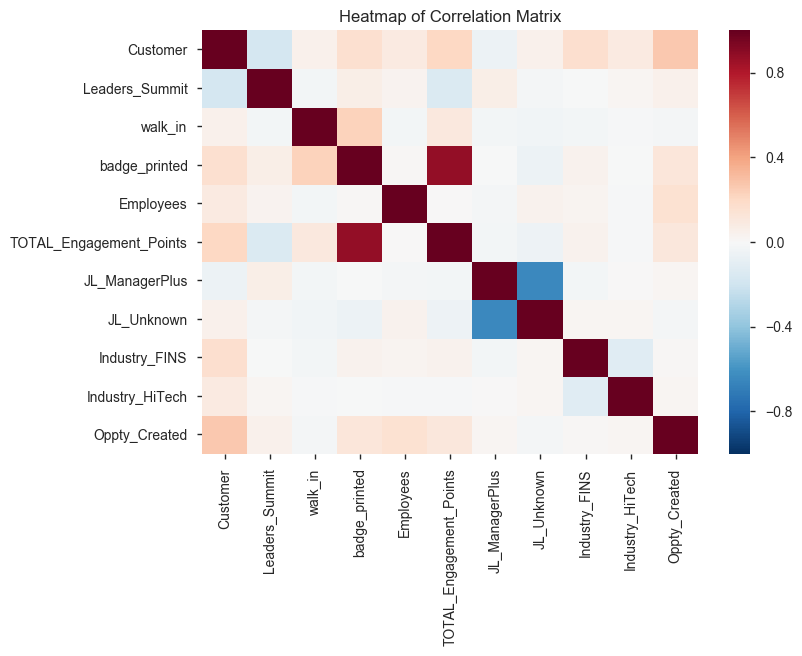

In [44]:
# Correlation Matrix
corr = Deleg_S.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

In [46]:
corr_Oppty_Created = pd.DataFrame(corr['Oppty_Created'].drop('Oppty_Created'))
corr_Oppty_Created.sort_values(by = 'Oppty_Created', ascending = False)

,Oppty_Created
Customer,0.269841
Employees,0.151406
badge_printed,0.118174
TOTAL_Engagement_Points,0.109943
Leaders_Summit,0.046898
JL_ManagerPlus,0.020268
Industry_HiTech,0.019999
Industry_FINS,0.014943
JL_Unknown,-0.018542
walk_in,-0.018823


## A visualisation of your data

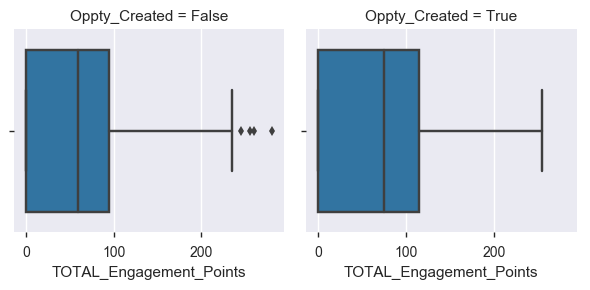

In [45]:
# Box Plot of Engagement Points vs Customer status
g = sns.FacetGrid(Deleg_S, col = 'Oppty_Created')
g.map(sns.boxplot, 'TOTAL_Engagement_Points')
# There's some signal in the noise - adding 0's to nulls could be an issue?

## One of the following with your data; Linear or Logistic Regression (with regularization), or Clustering.

In [84]:
# Specifying features and targets
feature_cols = ('Customer', 'Leaders_Summit', 'walk_in', 'badge_printed', 'Employees', 'TOTAL_Engagement_Points', 'JL_ManagerPlus', 'JL_Unknown', 'Industry_FINS', 'Industry_HiTech')
X = Deleg_S.drop('Oppty_Created',axis=1)
y = Deleg_S.Oppty_Created

In [55]:
# reference on column names (subset used above)
print(list(Deleg_S.columns))

['Customer', 'Leaders_Summit', 'walk_in', 'badge_printed', 'Employees', 'TOTAL_Engagement_Points', 'JL_ManagerPlus', 'JL_Unknown', 'Industry_FINS', 'Industry_HiTech', 'Oppty_Created']


In [85]:
# Randomly splitting off 10% of sample as holdout/test data for model evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [70]:
print(X_test.shape)
print(y_test.shape)

(1014, 10)
(1014,)


In [65]:
print(X_train.shape)
print(y_train.shape)

(9126, 10)
(9126,)


In [86]:
# Trialing Logistic Regression with CV and regularization
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV
logregcv = LogisticRegressionCV(Cs = [1e-4,1e-2,1e0,1e2,1e4], cv = 5, penalty='l2')

In [87]:
# Naively fit the model and return the coefficients
logregcv.fit(X_train,y_train)
feature_coef=zip(feature_cols,logregcv.coef_[0])
list(feature_coef)

[('Customer', 0.99911642234186171),
 ('Leaders_Summit', 0.14965978291864848),
 ('walk_in', -0.15111563849268819),
 ('badge_printed', 0.095243639340763686),
 ('Employees', 1.421422237231909e-05),
 ('TOTAL_Engagement_Points', 0.0024471187966947573),
 ('JL_ManagerPlus', -0.12324526689088659),
 ('JL_Unknown', -0.32803218398364964),
 ('Industry_FINS', -0.088791143026221792),
 ('Industry_HiTech', -0.019892005110275876)]

In [88]:
logregcv.score(X_train,y_train)

0.82226605303528377

In [89]:
# What is the accuracy on the test data
from sklearn.metrics import accuracy_score
y_pred = logregcv.predict(X_test)
accuracy_score(y_test,y_pred)

0.82544378698224852

In [90]:
# Alternative method - use "score"
logregcv.score(X_test,y_test)

0.82544378698224852

In [74]:
# How does this compare to randomly guessing or using the mode?
# The "Zero Rule Method"
# Ref 1: http://machinelearningmastery.com/dont-use-random-guessing-as-your-baseline-classifier/
# Ref 2: http://machinelearningmastery.com/implement-baseline-machine-learning-algorithms-scratch-python/

# zero rule algorithm for classification
def zero_rule_algorithm_classification(train, test):
    output_values = [row[-1] for row in train]
    prediction = max(set(output_values), key=output_values.count)
    predicted = [prediction for i in range(len(test))]
    return predicted
# Issues with this code

In [75]:
y_pred0 = zero_rule_algorithm_classification(X_train,X_test)

In [76]:
accuracy_score(y_test,y_pred0)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:177: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


0.0

In [91]:
# A better approach may be to use SKLearn's dummy estimators
# http://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.82544378698224852

In [ ]:
# Ok - I have no idea why there's 
# no difference between the dummy and the log reg CV classifier.

## A written summary describing your data

This workbook analyses the Tradeshow 'Delegate.xlsx' dataset. <br>
This dataset contains a mixture of delegate, company, and event engagement information. <br>
*The goal of this workbook is to identify which factors matter when predicting whether an opportunity will be created off the back of an event*. <br>
Opportunity Creation is a very narrow definition of whether a delegate will show "Return on Investment", as an opportunity is the record used to represent the pipeline of future deals and revenue. <br>
The potential application of the model is to score leads for followup by a company's sales team <br>
The findings from this work are as followbs: <br>
1. This is a **categorization** problem. The majority of the raw features are categorical, and there is a lot of work in determining which ones are most important, and generating dummies from them.
2. This is an unbalanced dataset (only 17% positive). It is uncertain at present how best to balance the dataset when training the model. Upsampling has been recommended. Candidate models of interest (including random forest and XGBoost) may not be able to handle an unbalanced dataset.
3. A logistic regression with cross validation and regularization does not perform better than a dummy model predicting the most frequent value. This may be a consequence of an unbalanced dataset, or may be indicative of the information held in the predictors. 
<br>
**Data Dictionary** <br>

 Label | Definition |
-------|------------|
'qr_uid'|Unique identifier for an event's delegate record (index)|

|'Customer'|Whether a record is an existing customer of the company. Values of "Yes" and NaN. All records are a Customer or a Prospect|
|'Prospect'|Whether a record is not an existing customer of the company. Values of "Yes" and NaN. All records are a Customer or a Prospect|
|'Leaders_Summit'|Whether a record participating in a premium, invitation only experience onsite. Values of "Yes" and NaN.|
|'registered'|Indicates a record registered before the event. Values of "Yes" and NaN.|
|'walk_in'|Indicates a record 'walked in' on the day. Values of "Yes" and NaN.|
|'manual'|Indicates a record manually registered (system thing). Values of "Yes" and NaN. Small sample count.|
|'cancelled'|Indicates a registration was cancelled for this record. Values of "Yes" and NaN. Small sample count.|
|'badge_printed'|Proxy variable for event attendance. Indicates a record's badge was printed.Values of "Yes" and NaN.|
|'Member_Type'|How the record is represented in a CRM. Either a lead or a contact. Could have data leakage, as a lead needs to be converted into a contact in the CRM for an opportunity to be created.|
|'Lead_Contact_ID'|Foreign Key for the CRM database. Has a value or is NaN|
|'Acount_ID'|Foreign Key for the CRM database. High Cardinality. Has a value or is NaN|
|'Job_Function'|TextCategory of the delegates job title into functions like "Marketing", "General Management". Significant fraction of records with "Uncategorized" or "Unspecified"|
|'Job_Level'|Text Category of the delegates job title into job levels like "Manager Level" or "Staff-Level". Significant fraction of records with "Uncategorized" or "Unspecified"|
|'Industry'|Text category, Industry of the account. High cardinality (quite messy). Some key industries for the business include "Financial Services" and "High-Tech". Some Null values.|
|'Employees'|Integer of the company number of employees. Can be null|
|'TOTAL_Attendance_Points'|Naive score reflecting the heuristic that registering before you attend increases the chances of oppty conversion, and prospects have more chances to convert than customers. Integer, has nulls (for people who didn't attend, or ~ didn't have their badge printed)|
|'TOTAL_Engagement_Points'|Feature of high interest to this project - the aggregate score of all interactions during the event. This could be requesting content on the tradeshow floor, attending sessions, or being scanned as a lead by an exhibitor. Integer, has nulls.|
|'TOTAL_Attendance_and_Engagement_Points'|Sum of TOTAL_Attendance_Points and TOTAL_Attendance_and_Engagement_Points|
|'Oppty_Created'| Target variable candidate. Whether an opportunity was created in the account that the delegate represented within a certain time of the event (snapshotted at 90 days). Boolean.|
|'No._of_Oppty'| Integer - number of opportunites created after the event. Has nulls.|





Label | Definition |
------|------------|
'qr_uid'|Unique identifier for an event's delegate record (index)
'Customer'|Whether a record is an existing customer of the company. Values of "Yes" and NaN. All records are a Customer or a Prospect
'Prospect'|Whether a record is not an existing customer of the company. Values of "Yes" and NaN. All records are a Customer or a Prospect
'Leaders_Summit'|Whether a record participating in a premium, invitation only experience onsite. Values of "Yes" and NaN.
'registered'|Indicates a record registered before the event. Values of "Yes" and NaN.
'walk_in'|Indicates a record 'walked in' on the day. Values of "Yes" and NaN.
'manual'|Indicates a record manually registered (system thing). Values of "Yes" and NaN. Small sample count.
'cancelled'|Indicates a registration was cancelled for this record. Values of "Yes" and NaN. Small sample count.
'badge_printed'|Proxy variable for event attendance. Indicates a record's badge was printed.Values of "Yes" and NaN.
'Member_Type'|How the record is represented in a CRM. Either a lead or a contact. Could have data leakage, as a lead needs to be converted into a contact in the CRM for an opportunity to be created.
'Lead_Contact_ID'|Foreign Key for the CRM database. Has a value or is NaN
'Acount_ID'|Foreign Key for the CRM database. High Cardinality. Has a value or is NaN
'Job_Function'|TextCategory of the delegates job title into functions like "Marketing", "General Management". Significant fraction of records with "Uncategorized" or "Unspecified"
'Job_Level'|Text Category of the delegates job title into job levels like "Manager Level" or "Staff-Level". Significant fraction of records with "Uncategorized" or "Unspecified"
'Industry'|Text category, Industry of the account. High cardinality (quite messy). Some key industries for the business include "Financial Services" and "High-Tech". Some Null values.
'Employees'|Integer of the company number of employees. Can be null
'TOTAL_Attendance_Points'|Naive score reflecting the heuristic that registering before you attend increases the chances of oppty conversion, and prospects have more chances to convert than customers. Integer, has nulls (for people who didn't attend, or ~ didn't have their badge printed)
'TOTAL_Engagement_Points'|Feature of high interest to this project - the aggregate score of all interactions during the event. This could be requesting content on the tradeshow floor, attending sessions, or being scanned as a lead by an exhibitor. Integer, has nulls.
'TOTAL_Attendance_and_Engagement_Points'|Sum of TOTAL_Attendance_Points and TOTAL_Attendance_and_Engagement_Points
'Oppty_Created'| Target variable candidate. Whether an opportunity was created in the account that the delegate represented within a certain time of the event (snapshotted at 90 days). Boolean.
'No._of_Oppty'| Integer - number of opportunites created after the event. Has nulls.